try to add scalebar to plots
Issue: do not exactly know the correct pixel dimensions. Is not in tiff metadata.
Try to calc from info on 10 website

https://support.10xgenomics.com/spatial-gene-expression/datasets/1.1.0/V1_Adult_Mouse_Brain

```
Mouse Brain Section (Coronal)
Spatial Gene Expression Dataset by Space Ranger 1.1.0

10x Genomics obtained fresh frozen mouse brain tissue (Strain C57BL/6)from BioIVT Asterand. The tissue was embedded and cryosectioned as described in Visium Spatial Protocols - Tissue Preparation Guide (Demonstrated Protocol CG000240). Tissue sections of 10 µm thickness from a slice of the coronal plane were placed on Visium Gene Expression Slides.

The slide was coverslipped and the H&E image acquired using a Nikon Ti2-E microscope with the following settings:

Color camera
10X objective
Numerical Aperture: 0.45
Exposure: 2 ms
Gain: 4.5X
```

In [4]:
import squidpy as sq
import scanpy as sc
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt

In [6]:
# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

In [7]:
pxsize = 11 # pixel size of microscope in um (https://www.google.com/search?client=safari&rls=en&q=Nikon+Ti2-E+microscope+pixel+size&ie=UTF-8&oe=UTF-8)
mag = 10 # 10X magnification
sf = adata.uns['spatial']['V1_Adult_Mouse_Brain']['scalefactors']['tissue_hires_scalef'] # scalefactor for actual image shown

In [5]:
# expect width of section to be about 4mm

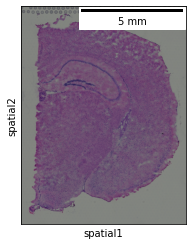

In [8]:
fig, ax = plt.subplots(1,1)
sc.pl.spatial(adata, ax=ax, show=False, img_key='hires')
scalebar = ScaleBar(pxsize/(mag*sf), units='um', length_fraction=1)
ax.add_artist(scalebar)

In [9]:
# scale seems to be slightly off - need to look into what might be causing this